In [3]:
pwd

'/Users/miafryer/Documents/flatiron_ds/phase 1/project1/microsoft_movies/individuals/arthur'

In [4]:
cd ../..

/Users/miafryer/Documents/flatiron_ds/phase 1/project1/microsoft_movies


In [5]:
#Import relevant packages
import pandas as pd
import matplotlib.pyplot as plt
from tools.data_preparation import *

In [6]:
df = merge_imdb_top_crew()

In [7]:
#filtered data set for the top 5 genres
filt_df = df[(df['genres'] == 'Action') |
             (df['genres'] == 'Adventure') |
             (df['genres'] == 'Sci-Fi') |
             (df['genres'] == 'Fantasy') |
             (df['genres'] == 'Animation')]

#filtered data set for directors only
filt_df = df[(df['category'] == 'director')]

In [8]:
#de-depe on movie constant (tconst) so that each row is one movie
dedup_df = filt_df.drop_duplicates(subset='tconst')

In [9]:
#sort the movies by number of votes first and then average rating
dedup_df.sort_values(by=['numvotes', 'averagerating'], ascending=[False, False],inplace=True)

#reset the index
dedup_df= dedup_df.reset_index()
#drop the previous index column
dedup_df.drop(columns='index', inplace=True)

<ipython-input-9-74bbde46e651>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dedup_df.sort_values(by=['numvotes', 'averagerating'], ascending=[False, False],inplace=True)


In [12]:
dedup_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,tt1431045,Deadpool,Deadpool,2016,108.0,Action,8.0,820847,5,nm1783265,director,NaN,NaN,Tim Miller,NaN,NaN,"director,writer,visual_effects","tt9561862,tt0425410,tt1431045,tt1981115"
1,tt2488496,Star Wars: Episode VII - The Force Awakens,Star Wars: Episode VII - The Force Awakens,2015,136.0,Action,8.0,784780,5,nm0009190,director,NaN,NaN,J.J. Abrams,1966.0,NaN,"producer,writer,music_department","tt0411008,tt0796366,tt1650062,tt2488496"
2,tt1392190,Mad Max: Fury Road,Mad Max: Fury Road,2015,120.0,Action,8.1,780910,5,nm0004306,director,NaN,NaN,George Miller,1945.0,NaN,"producer,writer,director","tt1392190,tt0079501,tt0082694,tt0366548"
3,tt3659388,The Martian,The Martian,2015,144.0,Adventure,8.0,680116,5,nm0000631,director,NaN,NaN,Ridley Scott,1937.0,NaN,"producer,director,production_designer","tt3659388,tt0083658,tt0172495,tt0103074"
4,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,Action,8.5,670926,5,nm0751577,director,NaN,NaN,Anthony Russo,1970.0,NaN,"producer,director,writer","tt1843866,tt4154756,tt3498820,tt4154796"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,tt4302938,Kubo and the Two Strings,Kubo and the Two Strings,2016,101.0,Action,7.8,105578,5,nm1325899,director,NaN,NaN,Travis Knight,1973.0,NaN,"animation_department,producer,director","tt4302938,tt4701182,tt1623288,tt0787474"
133,tt6499752,Upgrade,Upgrade,2018,100.0,Action,7.6,104978,5,nm1191481,director,NaN,NaN,Leigh Whannell,1977.0,NaN,"actor,writer,producer","tt1591095,tt0387564,tt6499752,tt3195644"
134,tt4172430,13 Hours,13 Hours,2016,144.0,Action,7.3,103625,5,nm0000881,director,NaN,NaN,Michael Bay,1965.0,NaN,"producer,director,actor","tt2109248,tt1055369,tt0117500,tt0120591"
135,tt3531824,Nerve,Nerve,2016,96.0,Action,6.5,102782,5,nm1160962,director,NaN,NaN,Henry Joost,NaN,NaN,"writer,producer,director","tt2109184,tt1152278,tt1778304,tt3531824"


In [50]:
cd images

/Users/miafryer/Documents/flatiron_ds/phase 1/project1/microsoft_movies/images


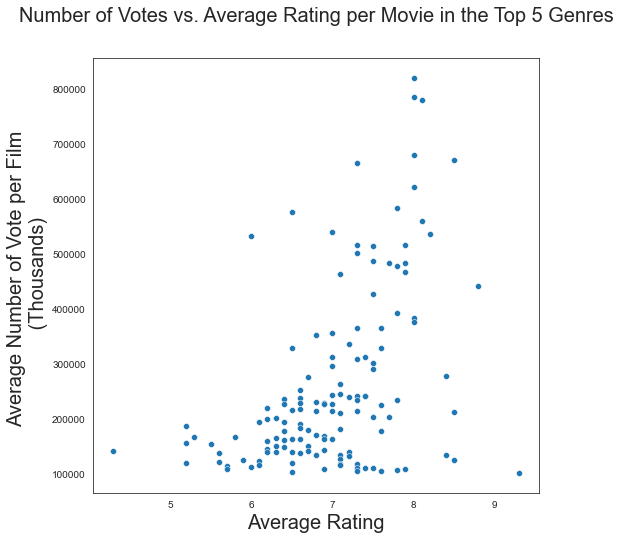

In [53]:


import seaborn as sns


sns.set_style("white",{"axes.facecolor": "1"})

#plot scatter plot: weighted average vs avg number of votes vs avg total gross
plt.figure(figsize = (8,8))
p= sns.scatterplot(data=dedup_df,
                x='averagerating', 
                y="numvotes", 
                palette="light:b")

plt.xlabel("Average Rating", size=20)
plt.ylabel('Average Number of Vote per Film \n (Thousands)', size=20)
plt.title("Number of Votes vs. Average Rating per Movie in the Top 5 Genres", y=1.07, size=20)

#for i, txt in enumerate(dedup_df['primary_title'][0:5]):
    #plt.annotate(txt,(dedup_df['averagerating'][i]+0.05, dedup_df['numvotes'][i]-50), size='large', color='black',annotation_clip = False, rotation=16)
    
             
#plt.savefig('crew.png', dpi=100, bbox_inches='tight')
    

In [57]:
#find the top five movies and get the tconsts
top_five_df = dedup_df.head(5)
top_five_tconst_df = top_five_df['tconst'].to_frame()

#merge the top five movie tconsts to the original data that was not de-dupe
top_direct_df = pd.merge(top_five_tconst_df, filt_df, on='tconst', how='inner')

#de-dupe by tconst and primary_name 
top_direct_df.drop_duplicates(subset=['tconst', 'primary_name'], inplace=True)
top_direct_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,tt1431045,Deadpool,Deadpool,2016,108.0,Action,8.0,820847,5,nm1783265,director,NaN,NaN,Tim Miller,NaN,NaN,"director,writer,visual_effects","tt9561862,tt0425410,tt1431045,tt1981115"
2,tt2488496,Star Wars: Episode VII - The Force Awakens,Star Wars: Episode VII - The Force Awakens,2015,136.0,Action,8.0,784780,5,nm0009190,director,NaN,NaN,J.J. Abrams,1966.0,NaN,"producer,writer,music_department","tt0411008,tt0796366,tt1650062,tt2488496"
5,tt1392190,Mad Max: Fury Road,Mad Max: Fury Road,2015,120.0,Action,8.1,780910,5,nm0004306,director,NaN,NaN,George Miller,1945.0,NaN,"producer,writer,director","tt1392190,tt0079501,tt0082694,tt0366548"
8,tt3659388,The Martian,The Martian,2015,144.0,Adventure,8.0,680116,5,nm0000631,director,NaN,NaN,Ridley Scott,1937.0,NaN,"producer,director,production_designer","tt3659388,tt0083658,tt0172495,tt0103074"
10,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,Action,8.5,670926,5,nm0751577,director,NaN,NaN,Anthony Russo,1970.0,NaN,"producer,director,writer","tt1843866,tt4154756,tt3498820,tt4154796"
13,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,Action,8.5,670926,6,nm0751648,director,NaN,NaN,Joe Russo,1971.0,NaN,"producer,director,writer","tt4154756,tt4154796,tt1843866,tt3498820"
